In [1]:
import os
os.chdir('C:\\Users\\David\\Documents\\GitHub\\Retreat_2019\\R_S_P')

In [2]:
#### Analysis rsp alcohol competition
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
import scikit_posthocs as sp
from function_randomness import randomness_sequence
from function_randomness_old import randomness_old



In [3]:
os.chdir('C:\\Users\\David\\Documents\\GitHub\\Retreat_2019\\R_S_P\\results')
os.listdir()

for idx, file in enumerate(os.listdir()):
    print(idx, file)

0 0_yerko_Tiff.xlsx
1 1 _Rocio_Heike.xlsx
2 1_alba_david.xlsx
3 1_Cris_Amanda.xlsx
4 1_genis_jordi.xlsx
5 1_jaime_vicky.xlsx
6 1_lejla_anna.xlsx
7 1_lluis_david.xlsx
8 1_lluis_joao.xlsx
9 1_lluis_klaus.xlsx
10 1_pablo_jorge.xlsx
11 2_anna_jordi.xlsx
12 2_lluis_klaus.xlsx
13 2_Pablo_Jaime.xlsx
14 2_vicky_jorge.xlsx


### Load the files into one DataFrame

In [4]:
#root_save = os.getcwd() + '\\results\\' 
#os.chdir(root_save)

os.listdir()

frames = []
for idx, file in enumerate(os.listdir()):
    df_s = pd.read_excel(file)
    df_s['rounds'] = idx
    randomness_p1 =  round(randomness_sequence(list(df_s['resp1'].values) )[0], 3) 
    randomness_p2 =  round(randomness_sequence(list(df_s['resp2'].values) )[0], 3) 
    #randomness_p1 =  round(randomness_old(list(df_s['resp1'].values) ), 3) 
    #randomness_p2 =  round(randomness_old(list(df_s['resp2'].values) ), 3)     
    df_s['randomness_p1']=randomness_p1
    df_s['randomness_p2']=randomness_p2
    frames.append(df_s)

df = pd.concat(frames, ignore_index=True)
df.head(10)


,player1,player2,resp1,resp2,result,winner_round,b_p1,b_p2,repetition,p1_lik_1,...,p2_lik_21,p1_lik_22,p2_lik_22,p1_lik_23,p2_lik_23,p1_lik_24,p2_lik_24,rounds,randomness_p1,randomness_p2
0,yerko,Tiff,p,r,yerko,yerko,3,3,0,0.000665,...,1.227084e-18,1.430363e-19,1.430363e-19,1.663665e-20,1.663665e-20,1.931154e-21,1.931154e-21,0,28.499,29.142
1,yerko,Tiff,s,p,yerko,yerko,3,3,0,0.000665,...,1.227084e-18,1.430363e-19,1.430363e-19,1.663665e-20,1.663665e-20,1.931154e-21,1.931154e-21,0,28.499,29.142
2,yerko,Tiff,s,r,Tiff,yerko,3,3,0,0.000665,...,1.227084e-18,1.430363e-19,1.430363e-19,1.663665e-20,1.663665e-20,1.931154e-21,1.931154e-21,0,28.499,29.142
3,yerko,Tiff,p,s,Tiff,yerko,3,3,0,0.000665,...,1.227084e-18,1.430363e-19,1.430363e-19,1.663665e-20,1.663665e-20,1.931154e-21,1.931154e-21,0,28.499,29.142
4,yerko,Tiff,s,p,yerko,yerko,3,3,0,0.000665,...,1.227084e-18,1.430363e-19,1.430363e-19,1.663665e-20,1.663665e-20,1.931154e-21,1.931154e-21,0,28.499,29.142
5,yerko,Tiff,r,p,Tiff,yerko,3,3,0,0.000665,...,1.227084e-18,1.430363e-19,1.430363e-19,1.663665e-20,1.663665e-20,1.931154e-21,1.931154e-21,0,28.499,29.142
6,yerko,Tiff,p,s,Tiff,yerko,3,3,0,0.000665,...,1.227084e-18,1.430363e-19,1.430363e-19,1.663665e-20,1.663665e-20,1.931154e-21,1.931154e-21,0,28.499,29.142
7,yerko,Tiff,s,s,draw,yerko,3,3,0,0.000665,...,1.227084e-18,1.430363e-19,1.430363e-19,1.663665e-20,1.663665e-20,1.931154e-21,1.931154e-21,0,28.499,29.142
8,yerko,Tiff,s,p,yerko,yerko,3,3,0,0.000665,...,1.227084e-18,1.430363e-19,1.430363e-19,1.663665e-20,1.663665e-20,1.931154e-21,1.931154e-21,0,28.499,29.142
9,yerko,Tiff,s,r,Tiff,yerko,3,3,0,0.000665,...,1.227084e-18,1.430363e-19,1.430363e-19,1.663665e-20,1.663665e-20,1.931154e-21,1.931154e-21,0,28.499,29.142


### Correlation beer consumption and randomness ?

In [6]:
df.repetition.unique()

array([0, 1, 2], dtype=int64)

In [7]:
df['rounds'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


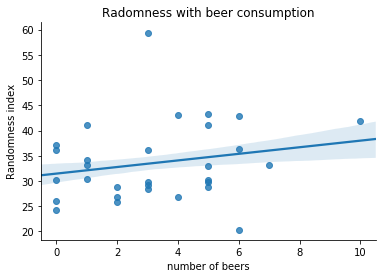

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.262
Date:                Fri, 15 Mar 2019   Prob (F-statistic):              0.271
Time:                        17:39:55   Log-Likelihood:                -103.18
No. Observations:                  30   AIC:                             210.4
Df Residuals:                      28   BIC:                             213.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.4538      2.376     13.239      0.0

In [8]:

beer_n = []
r_value=[]
winner=[]

for r in df['rounds'].unique():
    r_value.append(df.loc[df['rounds']==r,'randomness_p1'].iloc[0])
    r_value.append(df.loc[df['rounds']==r, 'randomness_p2'].iloc[0])
    beer_n.append(df.loc[df['rounds']==r, 'b_p1'].iloc[0])
    beer_n.append(df.loc[df['rounds']==r, 'b_p2'].iloc[0])  



df_b_r = pd.DataFrame({'beer': beer_n, 'rand': r_value})
sns.regplot(df_b_r['beer'], df_b_r['rand'], ci=68, fit_reg=True)
plt.title('Radomness with beer consumption')
plt.xlabel('number of beers')
plt.ylabel('Randomness index')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


#ols
mod = ols('rand ~ beer', data=df_b_r).fit()
print(mod.summary())

In [125]:
df_b_r

,beer,rand
0,3,0.003
1,3,0.002
2,1,0.003
3,5,0.004
4,0,0.002
5,0,0.002
6,3,0.008
7,5,0.004
8,6,0.004
9,3,0.003


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


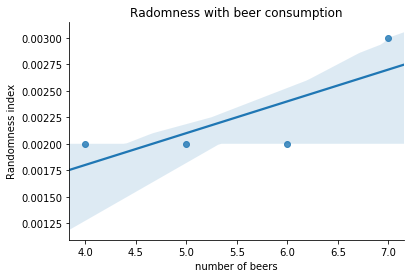

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     3.000
Date:                Fri, 15 Mar 2019   Prob (F-statistic):              0.225
Time:                        16:14:30   Log-Likelihood:                 27.136
No. Observations:                   4   AIC:                            -50.27
Df Residuals:                       2   BIC:                            -51.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.001      0.617      0.6

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


In [126]:

## lluis
beer_n = []
r_value=[]
winner=[]

df = df.loc[df['player1']=='lluis']
for r in df['rounds'].unique():
    r_value.append(df.loc[df['rounds']==r,'randomness_p1'].iloc[0])
    #r_value.append(df.loc[df['rounds']==r, 'randomness_p2'].iloc[0])
    beer_n.append(df.loc[df['rounds']==r, 'b_p1'].iloc[0])
    #beer_n.append(df.loc[df['rounds']==r, 'b_p2'].iloc[0])  



df_b_r = pd.DataFrame({'beer': beer_n, 'rand': r_value})
sns.regplot(df_b_r['beer'], df_b_r['rand'], ci=68, fit_reg=True)
plt.title('Radomness with beer consumption')
plt.xlabel('number of beers')
plt.ylabel('Randomness index')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


#ols
mod = ols('rand ~ beer', data=df_b_r).fit()
print(mod.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


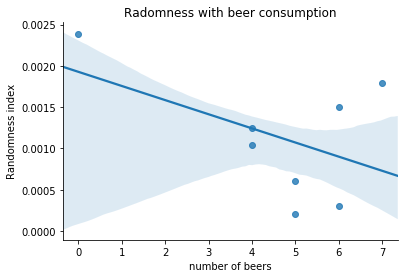

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     1.835
Date:                Fri, 15 Mar 2019   Prob (F-statistic):              0.224
Time:                        12:45:02   Log-Likelihood:                 47.759
No. Observations:                   8   AIC:                            -91.52
Df Residuals:                       6   BIC:                            -91.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0019      0.001      3.026      0.0

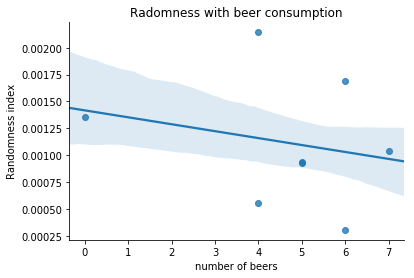

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                 -0.104
Method:                 Least Squares   F-statistic:                    0.3402
Date:                Fri, 15 Mar 2019   Prob (F-statistic):              0.581
Time:                        12:45:02   Log-Likelihood:                 48.825
No. Observations:                   8   AIC:                            -93.65
Df Residuals:                       6   BIC:                            -93.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0014      0.001      2.543      0.0

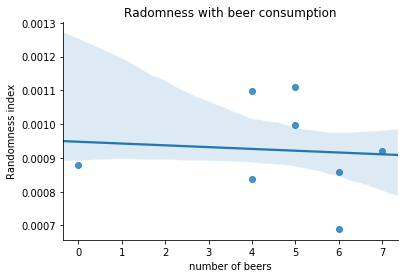

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.159
Method:                 Least Squares   F-statistic:                   0.03914
Date:                Fri, 15 Mar 2019   Prob (F-statistic):              0.850
Time:                        12:45:03   Log-Likelihood:                 60.142
No. Observations:                   8   AIC:                            -116.3
Df Residuals:                       6   BIC:                            -116.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0009      0.000      6.998      0.0

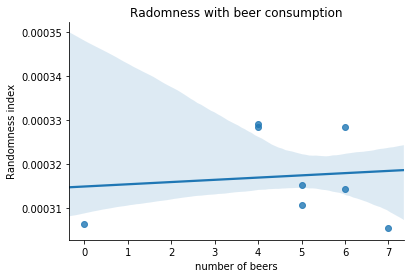

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.153
Method:                 Least Squares   F-statistic:                   0.07083
Date:                Fri, 15 Mar 2019   Prob (F-statistic):              0.799
Time:                        12:45:03   Log-Likelihood:                 81.330
No. Observations:                   8   AIC:                            -158.7
Df Residuals:                       6   BIC:                            -158.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003   9.58e-06     32.854      0.0

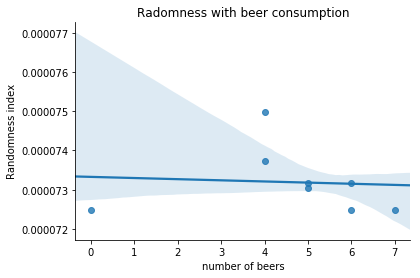

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.160
Method:                 Least Squares   F-statistic:                   0.03221
Date:                Fri, 15 Mar 2019   Prob (F-statistic):              0.863
Time:                        12:45:04   Log-Likelihood:                 100.99
No. Observations:                   8   AIC:                            -198.0
Df Residuals:                       6   BIC:                            -197.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.333e-05    8.2e-07     89.373      0.0

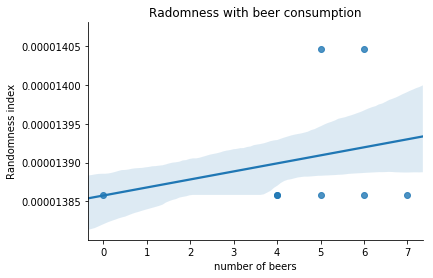

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                 -0.092
Method:                 Least Squares   F-statistic:                    0.4106
Date:                Fri, 15 Mar 2019   Prob (F-statistic):              0.545
Time:                        12:45:05   Log-Likelihood:                 119.51
No. Observations:                   8   AIC:                            -235.0
Df Residuals:                       6   BIC:                            -234.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.386e-05   8.11e-08    170.829      0.0

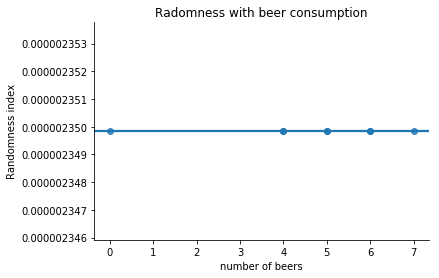

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -6.000
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        12:45:05   Log-Likelihood:                 379.58
No. Observations:                   8   AIC:                            -755.2
Df Residuals:                       6   BIC:                            -755.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.35e-06   6.17e-22   3.81e+15      0.0

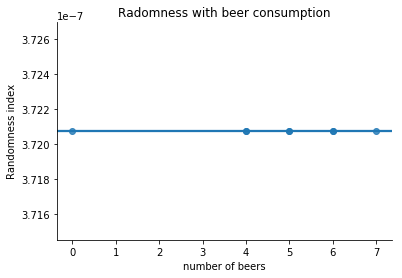

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -6.000
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        12:45:05   Log-Likelihood:                 396.22
No. Observations:                   8   AIC:                            -788.4
Df Residuals:                       6   BIC:                            -788.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.721e-07   7.71e-23   4.82e+15      0.0

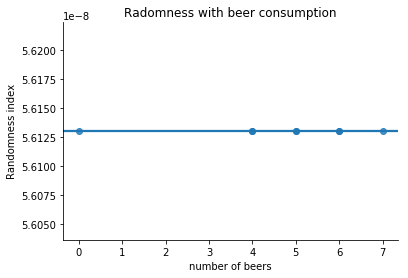

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -6.000
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        12:45:06   Log-Likelihood:                 408.90
No. Observations:                   8   AIC:                            -813.8
Df Residuals:                       6   BIC:                            -813.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.613e-08   1.58e-23   3.55e+15      0.0

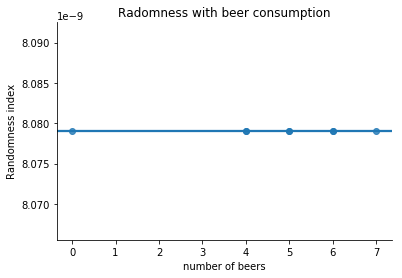

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -6.000
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        12:45:06   Log-Likelihood:                 425.82
No. Observations:                   8   AIC:                            -847.6
Df Residuals:                       6   BIC:                            -847.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.079e-09   1.91e-24   4.24e+15      0.0

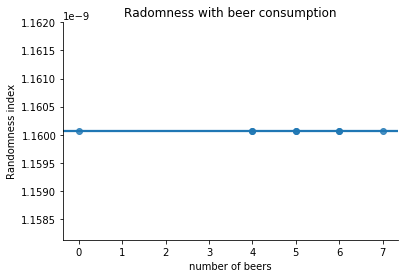

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -6.000
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        12:45:07   Log-Likelihood:                 439.31
No. Observations:                   8   AIC:                            -874.6
Df Residuals:                       6   BIC:                            -874.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.16e-09   3.53e-25   3.28e+15      0.0

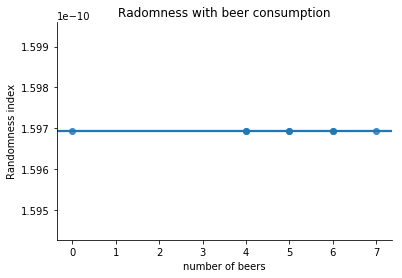

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -6.000
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        12:45:07   Log-Likelihood:                 451.26
No. Observations:                   8   AIC:                            -898.5
Df Residuals:                       6   BIC:                            -898.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.597e-10   7.93e-26   2.01e+15      0.0

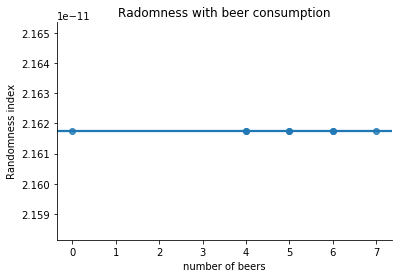

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -6.000
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        12:45:08   Log-Likelihood:                 468.99
No. Observations:                   8   AIC:                            -934.0
Df Residuals:                       6   BIC:                            -933.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.162e-11   8.65e-27    2.5e+15      0.0

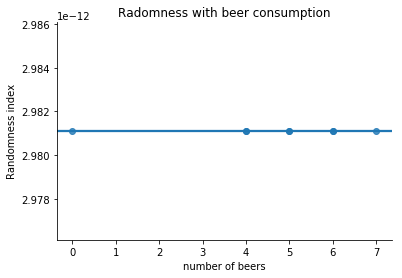

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -6.000
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        12:45:08   Log-Likelihood:                 484.53
No. Observations:                   8   AIC:                            -965.1
Df Residuals:                       6   BIC:                            -964.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.981e-12   1.24e-27    2.4e+15      0.0

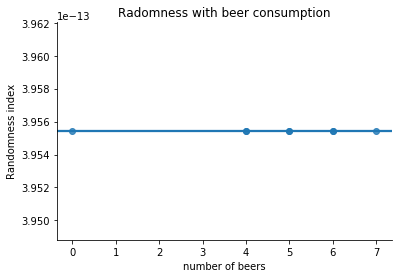

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -6.000
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        12:45:09   Log-Likelihood:                 500.04
No. Observations:                   8   AIC:                            -996.1
Df Residuals:                       6   BIC:                            -995.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.955e-13   1.78e-28   2.22e+15      0.0

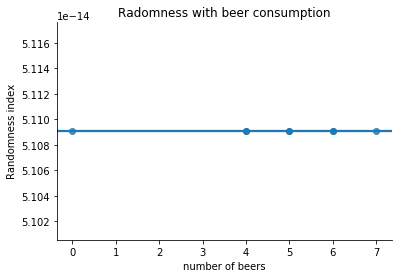

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -6.000
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        12:45:09   Log-Likelihood:                 516.12
No. Observations:                   8   AIC:                            -1028.
Df Residuals:                       6   BIC:                            -1028.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.109e-14   2.39e-29   2.14e+15      0.0

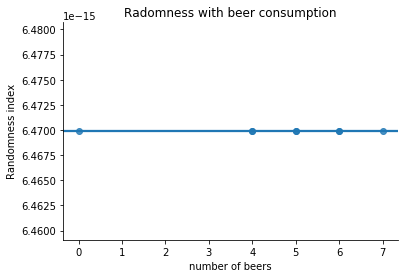

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -6.000
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        12:45:10   Log-Likelihood:                 535.11
No. Observations:                   8   AIC:                            -1066.
Df Residuals:                       6   BIC:                            -1066.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    6.47e-15   2.23e-30   2.91e+15      0.0

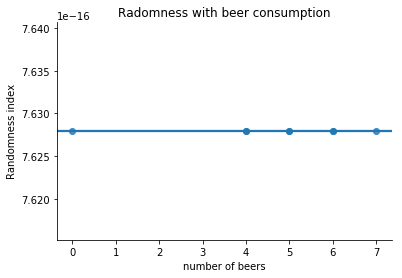

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -6.000
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        12:45:10   Log-Likelihood:                 549.39
No. Observations:                   8   AIC:                            -1095.
Df Residuals:                       6   BIC:                            -1095.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.628e-16   3.73e-31   2.04e+15      0.0

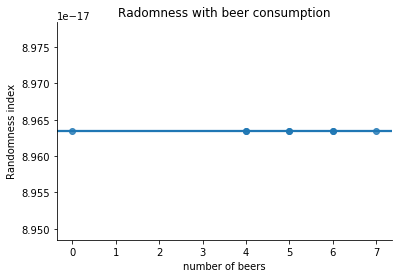

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -6.000
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        12:45:11   Log-Likelihood:                 568.80
No. Observations:                   8   AIC:                            -1134.
Df Residuals:                       6   BIC:                            -1133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.963e-17    3.3e-32   2.72e+15      0.0

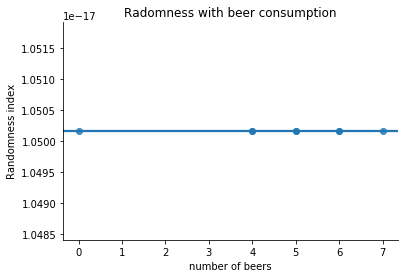

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -6.000
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        12:45:11   Log-Likelihood:                 586.35
No. Observations:                   8   AIC:                            -1169.
Df Residuals:                       6   BIC:                            -1169.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.05e-17   3.68e-33   2.85e+15      0.0

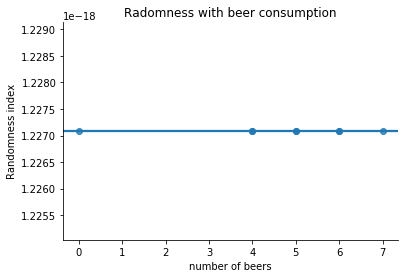

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -6.000
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        12:45:12   Log-Likelihood:                 602.07
No. Observations:                   8   AIC:                            -1200.
Df Residuals:                       6   BIC:                            -1200.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.227e-18   5.16e-34   2.38e+15      0.0

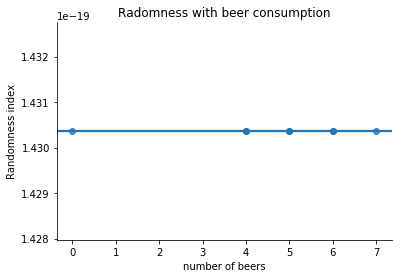

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -6.000
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        12:45:12   Log-Likelihood:                 618.71
No. Observations:                   8   AIC:                            -1233.
Df Residuals:                       6   BIC:                            -1233.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.43e-19   6.44e-35   2.22e+15      0.0

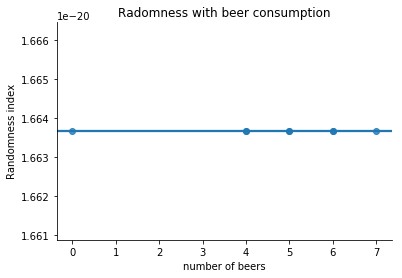

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -6.000
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        12:45:13   Log-Likelihood:                 638.93
No. Observations:                   8   AIC:                            -1274.
Df Residuals:                       6   BIC:                            -1274.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.664e-20   5.14e-36   3.24e+15      0.0

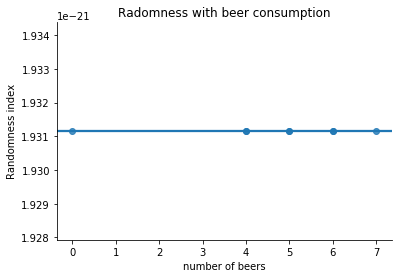

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -6.000
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        12:45:13   Log-Likelihood:                 656.84
No. Observations:                   8   AIC:                            -1310.
Df Residuals:                       6   BIC:                            -1310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.931e-21   5.48e-37   3.52e+15      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [104]:

probs_1 = ['p1_lik_1', 'p1_lik_2', 'p1_lik_3', 'p1_lik_4', 'p1_lik_5', 'p1_lik_6', 'p1_lik_7','p1_lik_8','p1_lik_9',
           'p1_lik_10', 'p1_lik_11', 'p1_lik_12', 'p1_lik_13', 'p1_lik_14', 'p1_lik_15', 'p1_lik_16', 'p1_lik_17', 
            'p1_lik_18', 'p1_lik_19', 'p1_lik_20', 'p1_lik_21', 'p1_lik_22', 'p1_lik_23', 'p1_lik_24']

probs_2 = ['p2_lik_1', 'p2_lik_2', 'p2_lik_3', 'p2_lik_4', 'p2_lik_5', 'p2_lik_6', 'p2_lik_7','p2_lik_8','p2_lik_9',
           'p2_lik_10', 'p2_lik_11', 'p2_lik_12', 'p2_lik_13', 'p2_lik_14', 'p2_lik_15', 'p2_lik_16', 'p2_lik_17', 
            'p2_lik_18', 'p2_lik_19', 'p2_lik_20', 'p2_lik_21', 'p2_lik_22', 'p2_lik_23', 'p2_lik_24']


           
for probs in range(0, len(probs_1)):
    ##         
    beer_n = []
    r_value=[]
    winner=[]

    for r in df['rounds'].unique():
        r_value.append(df.loc[df['rounds']==r, probs_1[probs]].iloc[0])
        r_value.append(df.loc[df['rounds']==r, probs_2[probs]].iloc[0])
        beer_n.append(df.loc[df['rounds']==r, 'b_p1'].iloc[0])
        beer_n.append(df.loc[df['rounds']==r, 'b_p2'].iloc[0])  



    df_b_r = pd.DataFrame({'beer': beer_n, 'rand': r_value})
    sns.regplot(df_b_r['beer'], df_b_r['rand'], ci=68, fit_reg=True)
    plt.title('Radomness with beer consumption')
    plt.xlabel('number of beers')
    plt.ylabel('Randomness index')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()
    plt.gca().get_yaxis().tick_left()
    plt.show()


    #ols
    mod = ols('rand ~ beer', data=df_b_r).fit()
    print(mod.summary())

## Is beeing random a good strategy to win?

In [127]:
v1 = df.loc[df['rounds']==r, 'randomness_p1'].iloc[0]
v2 = df.loc[df['rounds']==r, 'randomness_p2'].iloc[0]

np.mean([v1, v2])
#print(v1, v2)

0.003

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


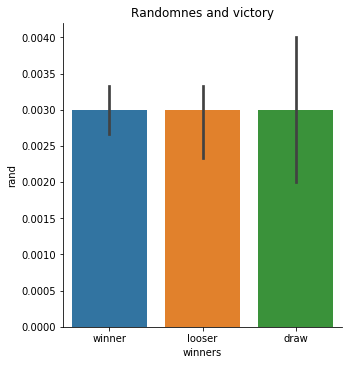

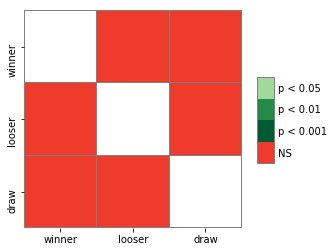

        winner  looser  draw
winner    -1.0     0.9   0.9
looser     0.9    -1.0   0.9
draw       0.9     0.9  -1.0


In [128]:
### I create a draw mean value by combing bothe the random value and beer consumption of the participants

w_r_value=[]
l_r_value=[]
d_r_value=[]

w_b=[]
l_b=[]
d_b=[]


for r in df['rounds'].unique():
    win = df.loc[df['rounds']==r, 'winner_round'].iloc[0]
    if win == df.loc[df['rounds']==r, 'player1'].iloc[0]:
        w_r_value.append(df.loc[df['rounds']==r, 'randomness_p1'].iloc[0])
        l_r_value.append(df.loc[df['rounds']==r, 'randomness_p2'].iloc[0])
        w_b.append(df.loc[df['rounds']==r, 'b_p1'].iloc[0])
        l_b.append(df.loc[df['rounds']==r, 'b_p2'].iloc[0])  
    elif win == df.loc[df['rounds']==r, 'player2'].iloc[0]:
        w_r_value.append(df.loc[df['rounds']==r, 'randomness_p2'].iloc[0])
        l_r_value.append(df.loc[df['rounds']==r, 'randomness_p1'].iloc[0])
        w_b.append(df.loc[df['rounds']==r, 'b_p2'].iloc[0])
        l_b.append(df.loc[df['rounds']==r, 'b_p1'].iloc[0])
    else: ## draw
        d_r_value.append(df.loc[df['rounds']==r, 'randomness_p2'].iloc[0] ) 
        d_r_value.append( df.loc[df['rounds']==r, 'randomness_p1'].iloc[0] )
        d_b.append(df.loc[df['rounds']==r, 'b_p2'].iloc[0] )
        d_b.append(df.loc[df['rounds']==r, 'b_p1'].iloc[0] )

        

### Dataframe for each    
df_win = pd.DataFrame({'beer': w_b, 'rand': w_r_value})
df_win['winners'] = 'winner'
df_l = pd.DataFrame({'beer': l_b, 'rand': l_r_value})
df_l['winners'] = 'looser'
df_d = pd.DataFrame({'beer': d_b, 'rand': d_r_value})
df_d['winners'] = 'draw'
#concatenate them
df_w_l=pd.concat([df_win, df_l, df_d], ignore_index=True)

#Difference in mean randomness?
sns.factorplot(x='winners', y='rand', data=df_w_l, kind='bar', ci=68)
plt.title('Randomnes and victory')
plt.show()

#mod = ols('rand ~ winners', data=df_w_l).fit()
#print(mod.summary())

pc = sp.posthoc_tukey(df_w_l, val_col='rand', group_col='winners') 
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.show()
print(pc)


### Is drinking a goos strategy?

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


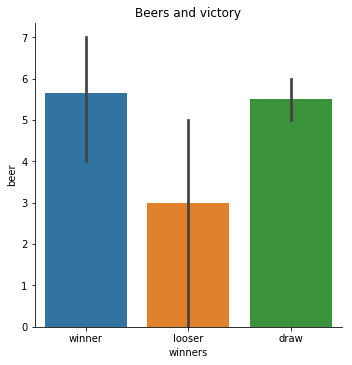

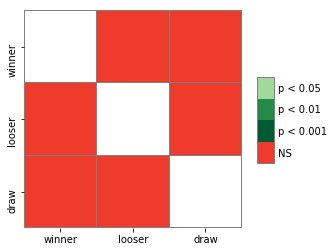

,winner,looser,draw
winner,-1.000000,0.303457,0.900000
looser,0.303457,-1.000000,0.409889
draw,0.900000,0.409889,-1.000000


In [129]:
#Difference in mean randomness?
sns.factorplot(x='winners', y='beer', data=df_w_l, kind='bar')
plt.title('Beers and victory')
plt.show()

pc = sp.posthoc_tukey(df_w_l, val_col='beer', group_col='winners') 
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.show()
pc

In [130]:

## Dimple regression model where we try to explain randomness as a function of beer consumption and as a winning strategy
mod = ols('rand ~ beer * C(winners)', data=df_w_l).fit()
print(mod.summary())


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                 -0.167
Method:                 Least Squares   F-statistic:                    0.8000
Date:                Fri, 15 Mar 2019   Prob (F-statistic):              0.637
Time:                        16:14:56   Log-Likelihood:                 49.456
No. Observations:                   8   AIC:                            -86.91
Df Residuals:                       2   BIC:                            -86.43
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [131]:
df_w_l['win']=(df_w_l['winners']=='winner')*1
mod = ols('win ~ beer', data=df_w_l).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                    win   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.172
Date:                Fri, 15 Mar 2019   Prob (F-statistic):              0.321
Time:                        16:14:59   Log-Likelihood:                -4.8345
No. Observations:                   8   AIC:                             13.67
Df Residuals:                       6   BIC:                             13.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0784      0.456     -0.172      0.8

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))
